In [38]:
from conllu import parse
from conllu.models import TokenList
from scipy.stats import entropy
import matplotlib.pyplot as plt
import functools
import tikzplotlib as tpl
from scipy import stats
import numpy as np
import seaborn as sns
import time 
import pandas as pd
import random
from tqdm import tqdm
import nltk
nltk.download('wordnet')
nltk.download('wordnet31')
nltk.download('omw-1.4')
from animacy_tagging import *
from nltk.corpus import wordnet as wn
import os 
from hebrew import Hebrew


try:
    from collections.abc import Iterable
except ImportError:
    from collections import Iterable

[nltk_data] Downloading package wordnet to /home/echeng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet31 to /home/echeng/nltk_data...
[nltk_data]   Package wordnet31 is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/echeng/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [39]:
# FILE FORMATS
all_tokens_df_format = '/home/echeng/morph_systems_entropy/wiki/{}/all_tokens_{}_wikipedia.csv' # .format(lang, lang)
all_types_df_format = '/home/echeng/morph_systems_entropy/wiki/{}/all_types_{}_wikipedia.csv' # .format(lang, lang)
anim_tokens_df_format = '/home/echeng/morph_systems_entropy/wiki/{}/anim_tokens_{}_wikipedia.csv' #.format(lang, lang)
anim_types_df_format = '/home/echeng/morph_systems_entropy/wiki/{}/anim_types_{}_wikipedia.csv'

In [40]:
import wn
for lex in wn.lexicons():
    print(f'{lex.id}:{lex.version}\t{lex.label}')

oewn:2021	Open English WordNet
omw-fr:1.4	WOLF (Wordnet Libre du Français)
omw-ca:1.4	Multilingual Central Repository (Catalan)
omw-es:1.4	Multilingual Central Repository (Spanish)
omw-it:1.4	MultiWordNet (Italian)
omw-en:1.4	OMW English Wordnet based on WordNet 3.0
odenet:1.4	Offenes Deutsches WordNet
odenet:1.3	Offenes Deutsches WordNet
omw-cmn:1.4	Chinese Open Wordnet
omw-lt:1.4	Lithuanian  WordNet
omw-pt:1.4	OpenWN-PT
omw-id:1.4	Wordnet Bahasa (Indonesian)
omw-he:1.4	Hebrew Wordnet
omw-eu:1.4	Multilingual Central Repository (Basque)
omw-sq:1.4	Albanet
omw-zsm:1.4	Wordnet Bahasa (Malaysian)
omw-arb:1.4	Arabic WordNet (AWN v2)
omw-fi:1.4	FinnWordNet
omw-sv:1.4	WordNet-SALDO
omw-gl:1.4	Multilingual Central Repository (Galician)
omw-el:1.4	Greek Wordnet
omw-pl:1.4	plWordNet
omw-iwn:1.4	ItalWordNet
omw-ro:1.4	Romanian Wordnet
omw-nl:1.4	Open Dutch WordNet
omw-ja:1.4	Japanese Wordnet
omw-sk:1.4	Slovak WordNet
omw-is:1.4	IceWordNet
omw-hr:1.4	Croatian Wordnet
omw-th:1.4	Thai Wordnet
omw-b

In [41]:
words = wn.words(pos='n', lexicon='odenet:1.4')
synsets = wn.synsets(pos='n', lexicon='odenet:1.4')

In [146]:
eng_anim_nouns = [word for word in wn.words(pos='n', lexicon='oewn:2021') if word.lemma().lower().replace(' ', '_') in eng_anim_lemmas]

NameError: name 'eng_anim_lemmas' is not defined

In [147]:
ger_anim_nouns = [word.translate(lexicon='odenet:1.4') for word in eng_anim_nouns]

NameError: name 'eng_anim_nouns' is not defined

In [96]:
translated_words_2 = set([word for translation in ger_anim_nouns for sense in list(translation.values()) for word in sense])

In [97]:
translated_words_2

{Word('w45639'),
 Word('w7504'),
 Word('w43408'),
 Word('w74774'),
 Word('w76783'),
 Word('w68346'),
 Word('w68116'),
 Word('w21619'),
 Word('w17397'),
 Word('w10917'),
 Word('w53014'),
 Word('w44583'),
 Word('w4443'),
 Word('w44354'),
 Word('w35925'),
 Word('w31482'),
 Word('w105186'),
 Word('w65071'),
 Word('w62845'),
 Word('w12093'),
 Word('w54186'),
 Word('w49974'),
 Word('w11863'),
 Word('w7625'),
 Word('w106357'),
 Word('w104130'),
 Word('w19745'),
 Word('w53365'),
 Word('w15286'),
 Word('w95415'),
 Word('w44475'),
 Word('w2114'),
 Word('w38037'),
 Word('w73845'),
 Word('w25153'),
 Word('w58756'),
 Word('w52317'),
 Word('w47870'),
 Word('w74787'),
 Word('w61919'),
 Word('w15411'),
 Word('w13166'),
 Word('w49046'),
 Word('w51039'),
 Word('w46820'),
 Word('w42597'),
 Word('w44596'),
 Word('w4456'),
 Word('w116330'),
 Word('w58877'),
 Word('w58648'),
 Word('w54428'),
 Word('w90267'),
 Word('w49987'),
 Word('w34890'),
 Word('w19758'),
 Word('w55598'),
 Word('w51390'),
 Word('w46942')

In [82]:
translated_words = [word.translate(lexicon='oewn:2021') for word in words]

In [87]:
translated_words_2 = set([word for translation in translated_words for sense in list(translation.values()) for word in sense])

In [100]:
translated_lemmas = [word.lemma().lower().replace(' ', '_') for word in translated_words_2]
translated_lemmas
with open(r'/home/echeng/morph_systems_entropy/german_animate_lemmas_from_english.txt', 'w') as fp:
    fp.write("\n".join(str(item) for item in translated_lemmas))

In [104]:
de_lemmas_file = open('/home/echeng/morph_systems_entropy/german_animate_lemmas_from_english.txt', 'r')
data = de_lemmas_file.read().split('\n')
de_lemmas_file.close()
data

['mikroorganismus',
 'schleimscheißer',
 'chauvinist',
 'fringilla_montifringilla',
 'gedichteschreiber',
 'diné',
 'morgenmensch',
 'quirl',
 'konsul',
 'neinsager',
 'floating_rate_note',
 'demonstrationsteilnehmer',
 'freundchen',
 'torpedo',
 'entbindungspfleger',
 'tuberkulös',
 'radsattel',
 'altes_weib',
 'lateinamerikaner',
 'beitrag',
 'sudelarbeit',
 'erdenbürger',
 'kaufmännischer_angestellter',
 'herpes_zoster',
 'behinderter_mensch',
 'vier_augen_sehen_mehr_als_zwei.',
 'treasurer',
 'auswechselspieler',
 'magier',
 'lügenbaron',
 'knochenmann',
 'pionier',
 'sterbeursache',
 'sabbelei',
 'bittgesuch',
 'kartoffelkäfer',
 'blankoscheck',
 'zeitungsbote',
 'elster',
 'amöbe',
 'punkt',
 'kernstück',
 'fixstern',
 'staatsanwalt',
 'mitglied',
 'hersteller',
 'schnodder',
 'anker',
 'gegenstück',
 'geschwister',
 'befürworter',
 'karnickel',
 'detonator',
 'conférencier',
 'dekorateur',
 'nichtsesshafter',
 'promotionsstudent',
 'verstellschlüssel',
 'kinder',
 'krähe',
 'rau

In [81]:
translation = words[50].translate(lexicon='oewn:2021')
translated_words = set([word.lemma().lower() for sense in list(translation.values()) for word in sense])
translated_words

{'client', 'consignee', 'customer'}

In [266]:
eng_lemmas = get_all_lemmas('eng')
eng_anim_lemmas = get_animate_lemmas('eng')

In [58]:
for eng_word in list(translation.values())[0]:
    print(eng_word)
    print(eng_word.lemma().replace(' ', '_'))
    lemma = eng_word.lemma().replace(' ', '_')
    print(lemma in eng_lemmas)
    print(lemma in eng_anim_lemmas)

Word('oewn-consignee-n')
consignee
True
True
Word('omw-en-consignee-n')
consignee
True
True


In [14]:
meta[0]

{'description': 'a nuclear reaction in which a massive nucleus splits into smaller nuclei with the simultaneous release of energy',
 'subject': 'noun.process'}

In [11]:
set([word.lemma().lower() for word in wn.words(pos='n', lexicon='odenet:1.4')])

{'westliche medizin',
 'versuch',
 'rechnerischer gewinn',
 'mehrfachstecker',
 'entzündung des nasenrachens',
 'prio',
 'hälfte',
 'hahn zudrehen',
 'grödnertal',
 'institution',
 'selbstsuggestion',
 'käsekuchen',
 'untertanengebiet',
 'eindampfen',
 'angewiesen-sein',
 'fingerzitrone',
 'kleinbürger',
 'glatter durchmarsch',
 'zunahme',
 'tischmanieren',
 'backhuhn',
 'leistungsvergleich',
 'refektorium',
 'handelsplatz',
 'exzesse',
 'tiefenmuskelentspannung',
 'g-sensor',
 'gefiederter freund',
 'basalzellenkrebs',
 'einzelinteresse',
 'katheder',
 'fränkische grafenbank',
 'raupenfahrzeug',
 'ausmerzen',
 'selektoren',
 'blondinenwitz',
 'spinalkanal',
 'rotpunktvisier',
 'knofi',
 'in schüben',
 'hochwertiges produkt',
 'höhenflug',
 'schreiber',
 'verständnis',
 'variante',
 'e. kfr.',
 'velounfall',
 'jagdreise',
 'pedologische karte',
 'abgekartete sache',
 'länder der böhmischen krone',
 'riesen...',
 'heiopei',
 'protokollstapel',
 '(offizielle) fachsprachliche bezeichnunge

In [5]:
from IPython.display import clear_output, display

In [42]:
wordnet_mapping = {
    'de': 'deu', # [x]
    'ca': 'cat', # [x]
    'en': 'eng', # [x]
    'ar': 'arb', # [ ]
    'fr': 'fra', # [x]
    'es': 'spa', # [x]
    'it': 'ita', # [x]
    'sv': 'swe', # [x]
    'he': 'heb', # [ ]
    'nl': 'nld', # [x]
    'pl': 'pol', # [x]
    'ru': 'eng', # [ ] There is no Russian wordnet.
    'sl': 'slv', # [x]
}

gender_mapping = {}

for l in ['de', 'ru', 'sl', 'pl']:
    gender_mapping[l] = ['Masc', 'Fem', 'Neut']
for l in ['ar', 'he', 'ca', 'fr', 'it', 'es']:
    gender_mapping[l] = ['Masc', 'Fem']
for l in ['sv']:
    gender_mapping[l] = ['Com', 'Neut']
for l in ['nl']:
    gender_mapping[l] = ['Com', 'Neut', ''] # plural has no gender
for l in ['en']:
    gender_mapping[l] = ['']
    
number_mapping = {}

for l in wordnet_mapping:
    if l in ['he', 'ar', 'sl']: number_mapping[l] = ['Sing', 'Plur', 'Dual']
    else:
        number_mapping[l] = ['Sing', 'Plur']

In [45]:
lang = 'ru'
# wn.synsets(b'\xe7\x8a\xac'.decode('utf-8'), lang='jpn')
wn_lang = wordnet_mapping[lang]
POSSIBLE_GENDERS = gender_mapping[lang]
POSSIBLE_NUMBERS = number_mapping[lang]

In [46]:
NOUNS = get_all_lemmas(wn_lang)
if lang == 'he':
    NOUNS = {str(Hebrew(noun).text_only()).replace('!', '') for noun in NOUNS}
len(NOUNS)

117953

In [49]:
NOUNS

{'casting_vote',
 'committal_service',
 'paramagnetism',
 'phaseolus_coccineus',
 'jointure',
 'bulrush_millet',
 'republication',
 'tilia_heterophylla',
 'laryngeal_artery',
 'jelly_fungus',
 'pob',
 'handyman',
 'flashbulb',
 'love_seat',
 'tradespeople',
 'debutante',
 'benjamin_rush',
 'babirussa',
 'lathyrus_tuberosus',
 'aminomethane',
 'hieratic',
 'pinaceae',
 'finnic',
 'ablism',
 'imperative_mood',
 'dance_band',
 'aquaculture',
 'auriparus_flaviceps',
 'metrazol_shock_treatment',
 'styracosaur',
 'quick-wittedness',
 'type_of_architecture',
 'food_shop',
 'lechery',
 'cirsium_rivulare',
 'bogmat',
 'ketose',
 'adventurer',
 'strongman',
 'handmaiden',
 'gossamer',
 'commensurateness',
 'joe_louis',
 'maryland',
 'fungicide',
 'bezique',
 'james_maitland_stewart',
 'celosia_argentea_cristata',
 'powder_method',
 'trampling',
 'dialysis',
 'clockwork_universe',
 'maiden_over',
 'coffee_bean',
 'jane_fonda',
 'castor_bean_plant',
 'spatterdock',
 'peckerwood',
 'sphyrapicus_var

In [47]:
ANIMATE_NOUNS = get_animate_lemmas(wn_lang)
if lang == 'he':
    ANIMATE_NOUNS = {str(Hebrew(noun).text_only()).replace('!', '') for noun in ANIMATE_NOUNS}
len(ANIMATE_NOUNS)

32642

In [48]:
fpaths = [
    f'/home/echeng/morph_systems_entropy/wiki/{lang}/{lang}_{i}_wikipedia.conllu' for i in range(20) 
    if os.path.exists(f'/home/echeng/morph_systems_entropy/wiki/{lang}/{lang}_{i}_wikipedia.conllu')
]
fpaths

['/home/echeng/morph_systems_entropy/wiki/ru/ru_0_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_1_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_2_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_3_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_4_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_5_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_6_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_7_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_8_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_9_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_10_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_11_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_12_wikipedia.conllu',
 '/home/echeng/morph_systems_entropy/wiki/ru/ru_13_wikipedia.conllu',
 '/home/echeng/morph_systems_e

In [12]:
all_tokens_df = []
for i, filepath in enumerate(fpaths):
    nouns = {'text':[], 'lemma': [], 'gender': [], 'number': [], 'animate': []}
    with open(filepath, 'r') as file:
        line = True
        counter = 0
        t = time.time()

        while line:
            # if lang=='en' and random.random() < 0.5: continue
            line = file.readline()
#             print(line)
            split_line = line.split('\t')

            if ('NOUN' in split_line): 
                
                counter += 1
                if time.time() - t > 1:
                    clear_output(wait=False)
                    print('nouns compiled: {}'.format(counter))
                    t = time.time()
                try:
                    text, lemma, morph_features = \
                        split_line[1].lower(), split_line[2].lower(), split_line[5].split('|')
                    number = [feat for feat in morph_features if 'Number' in feat][0][len('Number='):]
                    if number == 'Plur' and lang == 'nl': 
                        gender = ''
                    else:
                        gender = [feat for feat in morph_features if 'Gender' in feat][0][len('Gender='):] if lang != 'en' else ''
                except:
                    continue
                    
                if lemma.lower().replace(' ', '_') in NOUNS or lemma in NOUNS:
                    if lang == 'he':
                        text = str(Hebrew(text).text_only()).replace('!', "")
                        lemma = str(Hebrew(lemma).text_only()).replace('!', "")

                    nouns['text'].append(text)
                    nouns['lemma'].append(lemma.lower().replace(' ', '_'))
                    nouns['gender'].append(gender)
                    nouns['number'].append(number)
                    nouns['animate'].append(lemma.lower().replace(' ', '_') in ANIMATE_NOUNS or lemma in ANIMATE_NOUNS)
                
        print('Finished processing file')
        tokens_df = pd.DataFrame(nouns).groupby(['text', 'lemma', 'gender', 'number', 'animate']).size().reset_index(name='count')
        # tokens_df = tokens_df[(tokens_df['count'] > 1)] # no single-frequency
        all_tokens_df.append(tokens_df)
        print(tokens_df)
all_tokens_df = pd.concat(all_tokens_df)


nouns compiled: 44960590
Finished processing file
        text  lemma gender number  animate  count
0      'hood  'hood          Sing    False      2
1         'm     be          Sing    False      3
2         's     be          Plur    False      4
3         's     be          Sing    False      1
4        *ss    ass          Sing     True      2
...      ...    ...    ...    ...      ...    ...
62155   |yes    eye          Sing    False      1
62156     ωr     pr          Sing    False      1
62157     –t     nt          Sing    False      2
62158     ’d   have          Sing     True      7
62159     ’m     be          Sing    False      2

[62160 rows x 6 columns]


In [13]:
all_tokens_df = all_tokens_df.groupby(['text', 'lemma', 'gender', 'number', 'animate']).agg('sum').reset_index()

In [14]:
unfiltered_nouns_path = f'/home/echeng/morph_systems_entropy/wiki/{lang}/{lang}_stanza_tagged_nouns.csv'
all_tokens_df.to_csv(unfiltered_nouns_path)

In [15]:
all_tokens_df = pd.read_csv(f'/home/echeng/morph_systems_entropy/wiki/{lang}/{lang}_stanza_tagged_nouns.csv').drop(columns=['Unnamed: 0'])
all_tokens_df

,text,lemma,gender,number,animate,count
0,!acs,pac,NaN,Plur,False,6
1,#arts,part,NaN,Sing,False,3
2,#bits,ybit,NaN,Sing,False,1
3,#das,uda,NaN,Sing,False,1
4,#les,ale,NaN,Sing,False,2
...,...,...,...,...,...,...
85942,’m,be,NaN,Sing,False,4
85943,”s,se,NaN,Plur,False,7
85944,…’,am,NaN,Sing,False,1
85945,✠ams,cam,NaN,Sing,False,1


In [16]:
all_tokens_df = all_tokens_df.fillna('')

In [17]:
# all_tokens_df = pd.read_csv(all_tokens_df_format.format(lang, lang))

# Data cleaning: take the valid numbers and genders 
all_tokens_df = all_tokens_df[all_tokens_df['gender'].isin(POSSIBLE_GENDERS) & all_tokens_df['number'].isin(POSSIBLE_NUMBERS)]

if 'Unnamed: 0' in all_tokens_df.columns: all_tokens_df = all_tokens_df.drop(columns=['Unnamed: 0'])

# Take the lemmas that are in wordnet, that are alphanumeric, and remove rare nouns
all_tokens_df = all_tokens_df[all_tokens_df['lemma'].isin(NOUNS) \
                              & all_tokens_df['lemma'].str.isalnum() \
                              & all_tokens_df['text'].str.isalnum() \
                              & (all_tokens_df['text'].str.len() > 1) \
                              & (all_tokens_df['lemma'].str.len() > 1) \
                              & (all_tokens_df['count'] > 1)
                             ]

all_tokens_df.sort_values('count', ascending=False)
all_tokens_df
# all_tokens_df.to_csv(all_tokens_df_format.format(lang, lang))

,text,lemma,gender,number,animate,count
39,1000s,1000,,Plur,False,7
40,1000s,1000,,Sing,False,3
41,100s,100,,Plur,False,460
42,100s,100,,Sing,False,5
43,11s,11,,Plur,False,479
...,...,...,...,...,...,...
85914,½ibs,pib,,Plur,False,2
85918,øens,gen,,Plur,False,2
85919,ārons,iron,,Plur,False,3
85924,ωr,pr,,Sing,False,7


In [18]:
def print_frequencies(df, log=True):
    total_count = df['count'].sum()
    if log: print('Total count: ', total_count)
    
    dist = {}
    
    for number in df['number'].unique():
        for gender in df['gender'].unique():   
            count = df[(df['gender']==gender) & (df['number']==number)]['count'].sum()
            freq = count / total_count
            dist[gender + number] = freq
            if log:
                print('Count {}: {}'.format(gender + number, count))
                print('Freq {}: {}'.format(gender + number, freq))
            
    # Print entropy
    if log:
        dist = [val for val in list(dist.values()) if val > 0]
        print("Entropy: ", entropy(dist, base=2))

        # Print KL
        total_values = len(dist)
        print("KL: ", entropy(dist, [1/total_values for _ in range(total_values)], base=2))
    return dist

In [19]:
print_frequencies(all_tokens_df)

Total count:  411741299
Count Plur: 115242202
Freq Plur: 0.279889829560187
Count Sing: 296499097
Freq Sing: 0.720110170439813
Entropy:  0.8553006521822919
KL:  0.14469934781770813


[0.279889829560187, 0.720110170439813]

In [22]:
# ANIMATE TOKENS
animate_tokens = all_tokens_df[all_tokens_df['animate']]
animate_tokens
# Filter tokens by those that exist in both Sing and PLur
transparent_lemmas = animate_tokens[['lemma', 'number']]
transparent_lemmas = transparent_lemmas.groupby('lemma').agg('nunique').reset_index()
transparent_lemmas = set(transparent_lemmas[transparent_lemmas['number'] >= len(POSSIBLE_NUMBERS)]['lemma'])

# Filter tokens by those where all 4 gender x number possibilities exist.
# transparent_lemmas = animate_tokens[['lemma', 'gender', 'number', 'text']]
# transparent_lemmas['morph'] = transparent_lemmas['gender'] + transparent_lemmas['number']
# inflection_product = [gender + number for gender in POSSIBLE_GENDERS for number in POSSIBLE_NUMBERS]
# transparent_lemmas = transparent_lemmas[transparent_lemmas['morph'].isin(inflection_product)]
# transparent_lemmas = transparent_lemmas[['lemma', 'morph', 'text']].groupby('lemma').agg('nunique').reset_index()
# transparent_lemmas = set(transparent_lemmas[
#         (transparent_lemmas['morph'] >= 4) &
#         (transparent_lemmas['text'] >= 4)
#     ]['lemma']
# ) 
print(transparent_lemmas)


{'savage', 'bonobo', 'marshal', 'wuss', 'hadrosaur', 'handyman', 'debutante', 'organist', 'blighter', 'anatomist', 'minx', 'distiller', 'constituent', 'epidemiologist', 'reveler', 'help', 'tailorbird', 'adventurer', 'bobtail', 'handmaiden', 'louse', 'strongman', 'amnesic', 'prole', 'mummer', 'crapaud', 'lookdown', 'amir', 'sire', 'exporter', 'fomenter', 'peckerwood', 'mink', 'peccary', 'billfish', 'healer', 'toxicologist', 'babbler', 'colt', 'commentator', 'mermaid', 'truant', 'patrician', 'elater', 'geophysicist', 'pelican', 'paynim', 'calligraphist', 'wolfhound', 'barbarian', 'imbecile', 'teenager', 'browser', 'voter', 'eldest', 'fish', 'entoproct', 'polluter', 'dribbler', 'figure', 'clergyman', 'cosignatory', 'forebear', 'gendarme', 'blastocyst', 'nob', 'reed', 'equine', 'macroeconomist', 'mantle', 'authenticator', 'masquerader', 'drummer', 'dame', 'persecutor', 'stunner', 'gob', 'rambler', 'peacekeeper', 'cankerworm', 'archimandrite', 'lancelet', 'myxobacteria', 'rowdy', 'aryan', '

In [23]:
animate_tokens_df = animate_tokens[animate_tokens['lemma'].isin(transparent_lemmas)]
animate_tokens_df

,text,lemma,gender,number,animate,count
194,aardvark,aardvark,,Sing,True,276
195,aardvarks,aardvark,,Plur,True,147
213,abalone,abalone,,Sing,True,909
214,abalones,abalone,,Plur,True,81
239,abbe,abbe,,Sing,True,7
...,...,...,...,...,...,...
85852,zooplankton,zooplankton,,Plur,True,630
85853,zooplankton,zooplankton,,Sing,True,929
85854,zooplanktons,zooplankton,,Plur,True,3
85867,zorses,morse,,Plur,True,3


In [24]:
animate_tokens = animate_tokens_df.drop(['text'], axis=1)
filter = animate_tokens.groupby(['lemma', 'gender', 'number', 'animate'])['count'].transform(max) == animate_tokens['count']
animate_tokens = animate_tokens[filter]

/tmp/ipykernel_163877/2548112000.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  filter = animate_tokens.groupby(['lemma', 'gender', 'number', 'animate'])['count'].transform(max) == animate_tokens['count']


In [176]:
animate_tokens_df = pd.read_csv(anim_tokens_df_format.format(lang, lang))
animate_types_df = pd.read_csv(anim_types_df_format.format(lang, lang))
types_df = pd.read_csv(all_types_df_format.format(lang, lang))

In [25]:
# animate_types_df = animate_tokens_df.drop(['text'], axis=1)
animate_types_df = animate_tokens.copy()
animate_types_df['count'] = 1
animate_types_df

,lemma,gender,number,animate,count
194,aardvark,,Sing,True,1
195,aardvark,,Plur,True,1
213,abalone,,Sing,True,1
214,abalone,,Plur,True,1
239,abbe,,Sing,True,1
...,...,...,...,...,...
85850,zoophyte,,Sing,True,1
85851,zoophyte,,Plur,True,1
85852,zooplankton,,Plur,True,1
85853,zooplankton,,Sing,True,1


In [26]:
types_df = all_tokens_df.drop(['text'], axis=1)
types_df = types_df.groupby(['lemma', 'gender', 'number', 'animate']).agg('sum').reset_index()
types_df['count'] = 1
types_df.to_csv(all_types_df_format.format(lang, lang))

In [27]:
print_frequencies(types_df)

Total count:  69474
Count Plur: 26637
Freq Plur: 0.3834096208653597
Count Sing: 42837
Freq Sing: 0.6165903791346403
Entropy:  0.9604145775195483
KL:  0.03958542248045188


[0.3834096208653597, 0.6165903791346403]

In [28]:
print_frequencies(animate_tokens_df)

Total count:  106702403
Count Sing: 68722346
Freq Sing: 0.6440562168032898
Count Plur: 37980057
Freq Plur: 0.3559437831967102
Entropy:  0.9392646281088383
KL:  0.06073537189116185


[0.6440562168032898, 0.3559437831967102]

In [29]:
print_frequencies(animate_types_df)

Total count:  15210
Count Sing: 7602
Freq Sing: 0.49980276134122287
Count Plur: 7608
Freq Plur: 0.5001972386587771
Entropy:  0.9999998877494115
KL:  1.1225058858629264e-07


[0.49980276134122287, 0.5001972386587771]

In [30]:
def token_distribution(df, nounset, lang, save=False):
    fig, ax = plt.subplots()
    ax.set_xlim(left=1, right=21)
    ax.set_ylim(top=0.15)
    
    if lang != 'de':
        for number in POSSIBLE_NUMBERS:
            for gender in POSSIBLE_GENDERS:
                print(gender + number)
                # if number == 'Dual': continue
                try:
                    log_counts = np.log2(df[(df['gender']==gender) & (df['number']==number)]['count'])
                    loc = np.mean(log_counts)
                    scale = np.std(log_counts)
                    pdf = stats.norm.pdf(log_counts, loc=loc, scale=scale)
                    sns.lineplot(x=log_counts, y=pdf, ax=ax, label=(gender + number))
                except:
                    print(f'could not plot {number}x{gender}')
    else:
        for gender in POSSIBLE_GENDERS:
            number = 'Sing'
            try:
                log_counts = np.log2(df[(df['gender']==gender) & (df['number']=='Sing')]['count'])
                loc = np.mean(log_counts)
                scale = np.std(log_counts)
                pdf = stats.norm.pdf(log_counts, loc=loc, scale=scale)
                sns.lineplot(x=log_counts, y=pdf, ax=ax, label=(gender + number))
            except:
                print(f'could not plot {"Sing"}x{gender}')
        try:
            log_counts = np.log2(df[df['number']=='Plur']['count'])
            loc = np.mean(log_counts)
            scale = np.std(log_counts)
            pdf = stats.norm.pdf(log_counts, loc=loc, scale=scale)
            sns.lineplot(x=log_counts, y=pdf, ax=ax, label=('Plur'))
        except:
            print(f'could not plot Plur')

    plt.legend(fontsize=14)
    plt.title('{} nouns - Token Frequency ({})'.format(nounset, lang), fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Token frequency of occurrence (log)', fontsize=16)
    plt.ylabel('Probability Density', fontsize=16)
    if save:
        plt.tight_layout()
        for filetype in ('pdf', 'png'):
            plt.savefig('{}_nouns_Token_Frequency_{}.{}'.format(nounset, lang, filetype))

Sing


/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

Plur


/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

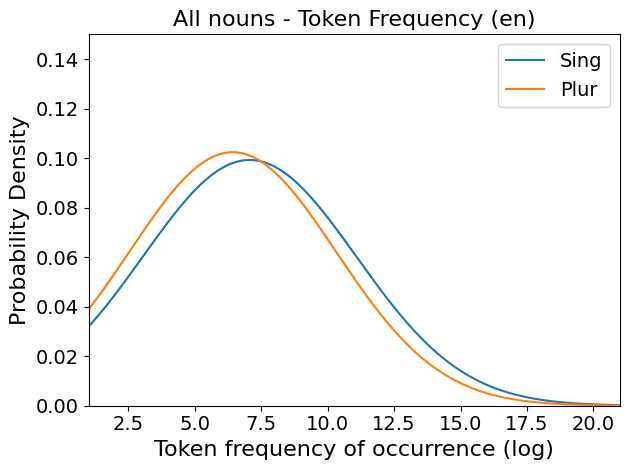

In [31]:
token_distribution(all_tokens_df, 'All', lang, save=True)

Sing


/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

Plur


/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/echeng/miniconda3/envs/compsem/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

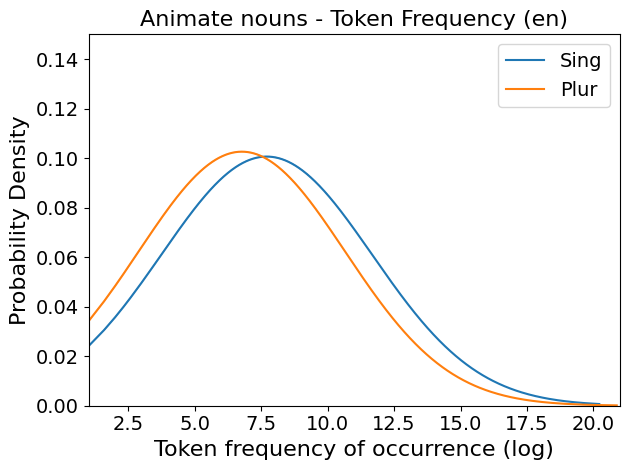

In [32]:
token_distribution(animate_tokens_df, 'Animate', lang, save=True)

In [33]:
def plot_noun_frequency_histogram(
    left_dataset, 
    right_dataset, 
    lang=None, 
    left_label=None, 
    right_label=None,
    legend=False,
    ax=None,
    save=False
):
    """
    :param figname: (str) tex file to save.
    :param token_dataset: Iterable(dict) The datasets of tokens (e.g. All nouns, Animate nouns) to plot pdf
    :param noun_set: (str) 'All' or 'Animate'
    """
    # Count number
    data = []
    for i, dataset in enumerate([left_dataset, right_dataset]):
        print([left_label, right_label][i])
        dist = print_frequencies(dataset, log=False)
        print(dist)
        data.append(dist)

    labels = [left_label, right_label]

    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars
    
    if not ax:
        fig, ax = plt.subplots()
    ax.set_ylim(top=0.75)

    # create the bars
    rects = []
    if lang not in ('nl', 'de'):
        for i, number in enumerate(POSSIBLE_NUMBERS):
            if number == 'Dual': continue
            for j, gender in enumerate(POSSIBLE_GENDERS):
                values = [dist[gender + number] for dist in data]
                rect = ax.bar(x + (2*i - 3 + 4*j) * width / 2, values, width, label=(gender+number))
                rects.append(rect) 
    elif lang == 'de':
        for i, number in enumerate(['Sing']):
            for j, gender in enumerate(POSSIBLE_GENDERS):
                values = [dist[gender + number] for dist in data]
                rect = ax.bar(x + (i - 3 + 2*j) * width / 2, values, width, label=(gender+number))
                rects.append(rect) 
        for i, number in enumerate(['Plur']):
            values = [sum([dist[gender + number] for gender in POSSIBLE_GENDERS]) for dist in data]
            rect = ax.bar(x + (i - 1 + 2*j) * width / 2, values, width, label=(number))
            rects.append(rect) 
    elif lang == 'nl':
        for i, number in enumerate(['Sing']):
            for j, gender in enumerate(['Com', 'Neut']):
                values = [dist[gender + number] for dist in data]
                rect = ax.bar(x + (i - 3 + 2*j) * width / 2, values, width, label=(gender+number))
                rects.append(rect) 
        for i, number in enumerate(['Plur']):
            values = [dist[number] for dist in data]
            rect = ax.bar(x + (i - 1 + 2*j) * width / 2, values, width, label=(number))
            rects.append(rect) 

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.set_title('Distribution of Nouns across Gender and Number ({})'.format(lang), fontsize=12)
    ax.set_title(lang, fontsize=16)
    ax.set_xticks(x, labels)
    ax.tick_params(axis='both', which='major', labelsize=14)

    if legend:
        ax.legend(fontsize=12, loc='upper left') # (0.05, 0.8))

    for rect in rects:
        ax.bar_label(rect, padding=3, fmt='%.2f', fontsize=12)

    # Plot line at uniform distribution (y = 0.25)
    ax.axhline(y=1 / (len(POSSIBLE_GENDERS) * len(POSSIBLE_NUMBERS)), color='r', linestyle='--')

    if save:
        plt.tight_layout()
        for filetype in ('pdf', 'png'):
            plt.savefig('{}_{}_nouns_Frequency_histogram_{}.{}'.format(left_label, right_label, lang, filetype))

All nouns - Tokens
{'FemSing': 0.35299171698020265, 'MascSing': 0.3423564073382937, 'FemPlur': 0.1376531956164454, 'MascPlur': 0.16699868006505825}
Anim. nouns - Tokens
{'MascSing': 0.6640282648012134, 'FemSing': 0.041623368870690305, 'MascPlur': 0.28311231190331954, 'FemPlur': 0.011236054424776805}
All nouns - Tokens
{'MascPlur': 0.16094754945509915, 'FemPlur': 0.13088033756109752, 'MascSing': 0.3517892828137045, 'FemSing': 0.35638283017009886}
Anim. nouns - Tokens
{'FemSing': 0.0872654973042863, 'MascSing': 0.5034739333024323, 'FemPlur': 0.013149227879290576, 'MascPlur': 0.39611134151399086}
All nouns - Tokens
{'MascPlur': 0.16127348785828505, 'FemPlur': 0.10999602146603434, 'MascSing': 0.3946491683368516, 'FemSing': 0.33408132233882903}
Anim. nouns - Tokens
{'MascSing': 0.5569366329752853, 'FemSing': 0.09285883207241531, 'MascPlur': 0.32276242969677754, 'FemPlur': 0.02744210525552179}
All nouns - Tokens
{'MascSing': 0.3963753546057603, 'FemSing': 0.3587514076282425, 'MascPlur': 0.13

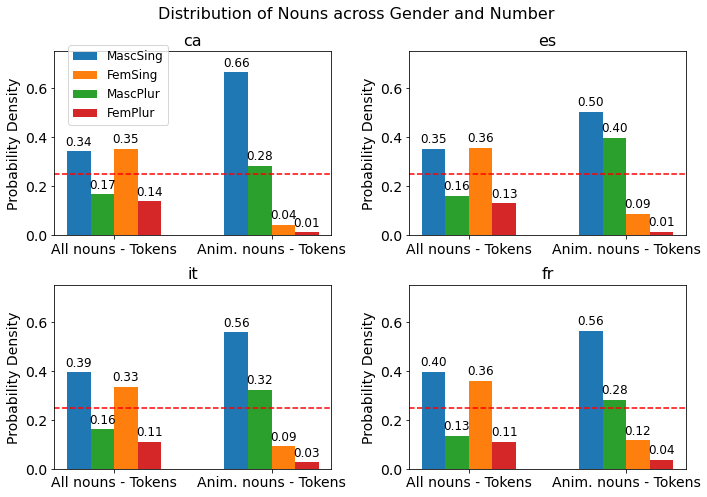

In [119]:
# Load in the langs
all_token_dfs = {}
animate_token_dfs = {}
langs = ['ca', 'es', 'it', 'fr']
for lang in langs:
    animate_token_dfs[lang] = pd.read_csv(f'/home/echeng/morph_systems_entropy/wiki/{lang}/anim_tokens_{lang}_wikipedia.csv')
    all_tokens_df = pd.read_csv(f'/home/echeng/morph_systems_entropy/wiki/{lang}/all_tokens_{lang}_wikipedia.csv')
    wn_lang = wordnet_mapping[lang]
    POSSIBLE_GENDERS = gender_mapping[lang]
    POSSIBLE_NUMBERS = number_mapping[lang]
    NOUNS = get_all_lemmas(wn_lang)
    
    
    all_tokens_df = all_tokens_df[all_tokens_df['gender'].isin(POSSIBLE_GENDERS) & all_tokens_df['number'].isin(POSSIBLE_NUMBERS)]
    all_tokens_df = all_tokens_df.drop(columns=['Unnamed: 0'])
    all_tokens_df = all_tokens_df[all_tokens_df['lemma'].isin(NOUNS) \
                                  & all_tokens_df['lemma'].str.isalnum() \
                                  & (all_tokens_df['lemma'].str.len() > 1)
                                 ]
    all_tokens_df = all_tokens_df[(all_tokens_df['count'] > 1) & (all_tokens_df['lemma'].str.len() > 1)]
    all_tokens_df.sort_values('count', ascending=False)
    all_token_dfs[lang] = all_tokens_df


fig, axs = plt.subplots(nrows=2, ncols=2, squeeze=True, figsize=(10,7))
axs = [ax for ax_ in axs for ax in ax_]
for i, ax in enumerate(axs):
    plot_noun_frequency_histogram(
        all_token_dfs[langs[i]], 
        animate_token_dfs[langs[i]], 
        lang=langs[i], 
        left_label='All nouns - Tokens', 
        right_label = 'Anim. nouns - Tokens',
        ax=ax,
        legend=langs[i]=='ca'
    )
fig.subplots_adjust(wspace=0.2, hspace=0.3)
fig.suptitle('Distribution of Nouns across Gender and Number', fontsize=16)
fig.tight_layout()

plt.show()
fig.savefig('romance_languages_token_dists.pdf')

Anim. nouns - Types
{'Sing': 0.49980276134122287, 'Plur': 0.5001972386587771}
Anim. nouns - Tokens
{'Sing': 0.6440562168032898, 'Plur': 0.3559437831967102}


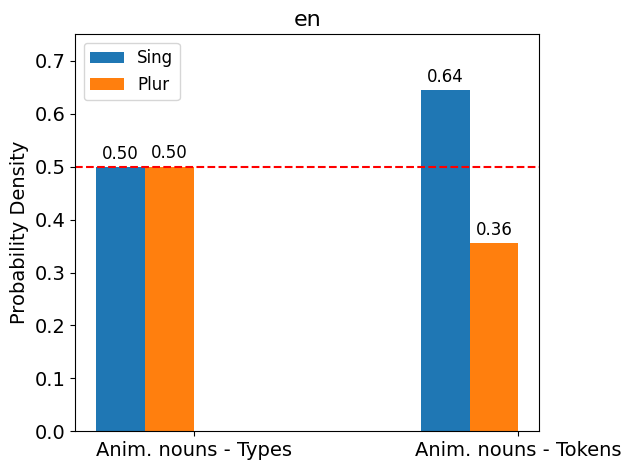

In [34]:
plot_noun_frequency_histogram(animate_types_df, animate_tokens_df, lang=lang, left_label='Anim. nouns - Types', 
        right_label = 'Anim. nouns - Tokens', legend=True, save=True)

All nouns - Types
{'Plur': 0.3834096208653597, 'Sing': 0.6165903791346403}
All nouns - Tokens
{'Plur': 0.279889829560187, 'Sing': 0.720110170439813}


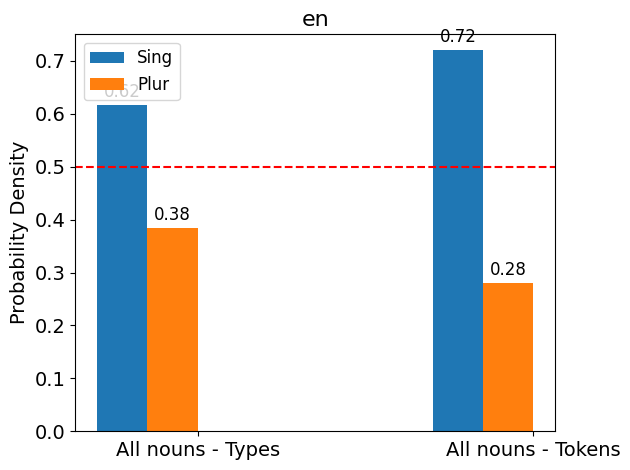

In [35]:
plot_noun_frequency_histogram(types_df, all_tokens_df, lang=lang, left_label='All nouns - Types', 
        right_label = 'All nouns - Tokens', legend=True, save=True)

In [37]:
all_tokens_df.to_csv(f'/home/echeng/morph_systems_entropy/wiki/{lang}/all_tokens_{lang}_wikipedia.csv')
types_df.to_csv(f'/home/echeng/morph_systems_entropy/wiki/{lang}/all_types_{lang}_wikipedia.csv')
animate_types_df.to_csv(f'/home/echeng/morph_systems_entropy/wiki/{lang}/anim_types_{lang}_wikipedia.csv')
animate_tokens_df.to_csv(f'/home/echeng/morph_systems_entropy/wiki/{lang}/anim_tokens_{lang}_wikipedia.csv')